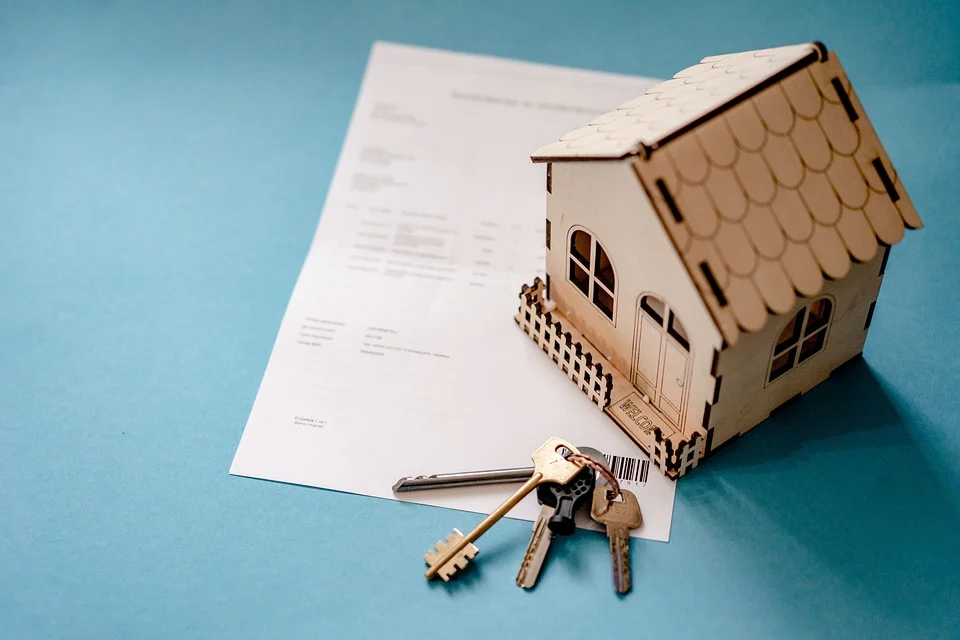

In [1]:
# Libraries
import pandas as pd
import numpy as np

In [2]:
sales_df = pd.read_csv('C:/Users/Ntando/OneDrive/Documents/71point4/clients/cahf/nigeria/nigeria_house_prices/output/sales_d.csv')

In [3]:
#Slicing the data
sales_df_ = sales_df.drop_duplicates()
sales_df_ = sales_df_.loc[(sales_df_['type'] == 'houses') & (sales_df_['type_'].isna())]
sales_df_.sort_values('ad_id').head(5)

,Unnamed: 0,ad_id,date_add,title,ad_url,address,currency,price_display,price_parsed,sqm_9,...,sqm,sqm_11,bedroom,bathroom,toilet,parking_space,sqm_12,loc,type,type_
1778,1779,0001e80be1aef98,2022-03-05,Super Cheap 4 Bedroom Terrace House + Bq Etc,/for-sale/houses/terraced-duplexes/lagos/ikoyi...,"Parkview, Ikoyi, Lagos",₦,"₦185,000,000",185000000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ikoyi,houses,NaN
52832,52833,000c3b3c73a779c,2021-07-07,"Elegant, Superb 5 Bedroom Detached House",/for-sale/houses/detached-duplexes/lagos/lekki...,"Lekki, Lagos",₦,"₦100,000,000",100000000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lekki,houses,NaN
14378,14379,000fec7a4574e53,2022-01-27,4 Bedroom Detached Duplex,/for-sale/houses/detached-duplexes/lagos/lekki...,"Vgc, Ikota, Lekki, Lagos",₦,"₦98,000,000",98000000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lekki,houses,NaN
1715,1716,001353568320c99,2022-04-20,Luxury 5 Bedroom Fully Detached Duplex,/for-sale/houses/detached-duplexes/lagos/ikoyi...,"Ikoyi, Lagos",₦,"₦700,000,000",700000000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ikoyi,houses,NaN
46849,46850,0013e58ee9f954d,2021-10-07,4 Bedroom Semi Detached Tastefully Finished,/for-sale/houses/semi-detached-duplexes/lagos/...,"Harris Drive, VGC, Lekki, Lagos",₦,"₦64,500,000",64500000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lekki,houses,NaN


In [4]:
# Convert the price to a USD price
sales_df_.loc[sales_df_['currency'] == '₦', 'usd_price'] = sales_df_['price_parsed'] * 0.024
sales_df_.loc[sales_df_['currency'] !='₦', 'usd_price'] = sales_df_['price_parsed'] 

In [5]:
sales_df_.head(4)

,Unnamed: 0,ad_id,date_add,title,ad_url,address,currency,price_display,price_parsed,sqm_9,...,sqm_11,bedroom,bathroom,toilet,parking_space,sqm_12,loc,type,type_,usd_price
1,2,128c666fc43f478,2022-03-09,Newly Built 3 Bedroom Terraced Duplex With 6 M...,/for-sale/houses/terraced-duplexes/lagos/lekki...,"Ikota, Lekki, Lagos",₦,"₦30,000,000",30000000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Lekki,houses,NaN,720000.0
2,3,1b1fc761b31e644,2022-04-19,3 Bedroom Fully Detached Bungalow With A Bq,/for-sale/houses/detached-bungalows/lagos/lekk...,"Orinbanwa, Awoyaya, Ibeju Lekki, Lagos",₦,"₦33,500,000",33500000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Lekki,houses,NaN,804000.0
3,4,9b9ae7b7136680f,2022-04-24,4 Bedroom Townhouse,/for-sale/houses/lagos/lekki/lekki-phase-1/129...,"Lekki Phase 1, Lekki, Lagos",₦,"₦200,000,000",200000000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Lekki,houses,NaN,4800000.0
4,5,8d46abf91274bd0,2022-04-24,Luxury 4 Bedroom Semi-detached Home With Mortg...,/for-sale/houses/semi-detached-duplexes/lagos/...,"Ogombo Road, Lekki Phase 2, Lekki, Lagos",₦,"₦67,000,000",67000000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Lekki,houses,NaN,1608000.0


In [6]:
df = sales_df_[['date_add', 'usd_price']]
df = df.sort_values('date_add').groupby('date_add')['usd_price'].agg(mean = 'mean', 
                                median = 'median',
                                            n = 'count', minimum = 'min', maximum = 'max')

df

,mean,median,n,minimum,maximum
date_add,,,,,
2020-04-26,2.860000e+06,2860000.0,2,720000.0,5000000.0
2020-05-04,4.792000e+06,1680000.0,3,696000.0,12000000.0
2020-05-05,6.895000e+05,689500.0,2,504000.0,875000.0
2020-05-06,2.460000e+06,2460000.0,2,600000.0,4320000.0
2020-05-07,2.361000e+07,24720000.0,4,1800000.0,43200000.0
...,...,...,...,...,...
2022-04-20,3.868373e+06,2040000.0,271,144000.0,48000000.0
2022-04-21,4.250259e+06,2160000.0,301,48000.0,182400000.0
2022-04-22,2.956039e+06,2040000.0,307,240000.0,22800000.0


## Exploratory Data Analysis

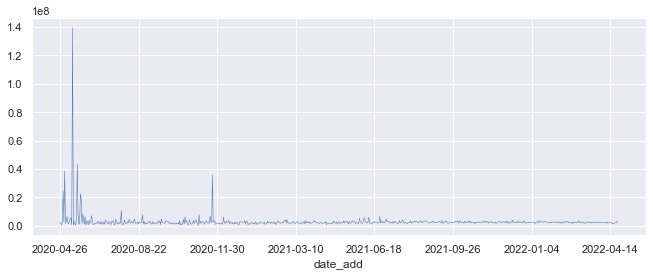

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = 'darkgrid')
sns.set(rc={'figure.figsize':(11, 4)})


df['median'].plot(linewidth=0.5)
plt.show()


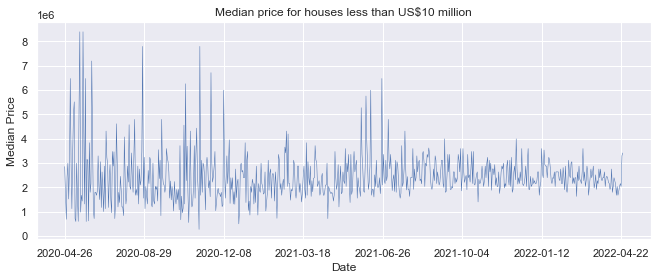

In [8]:
# Zoom in the data 
zoom_in = df.loc[df['median'] < 0.1e8]
ax = zoom_in['median'].plot(linewidth=0.5)

ax.set_ylabel('Median Price')
ax.set_xlabel('Date')
ax.set_title('Median price for houses less than US$10 million')
plt.show()

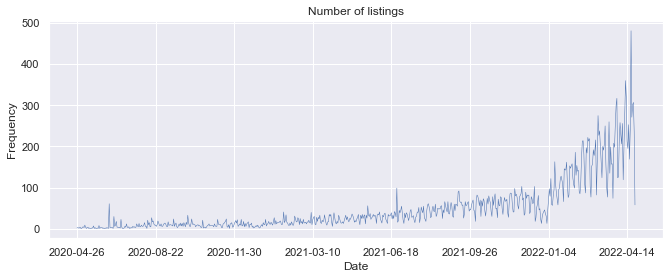

In [9]:
# Number of listings
ax = df['n'].plot(linewidth=0.5)
ax.set_ylabel('Frequency')
ax.set_xlabel('Date')
ax.set_title('Number of listings')
plt.show()

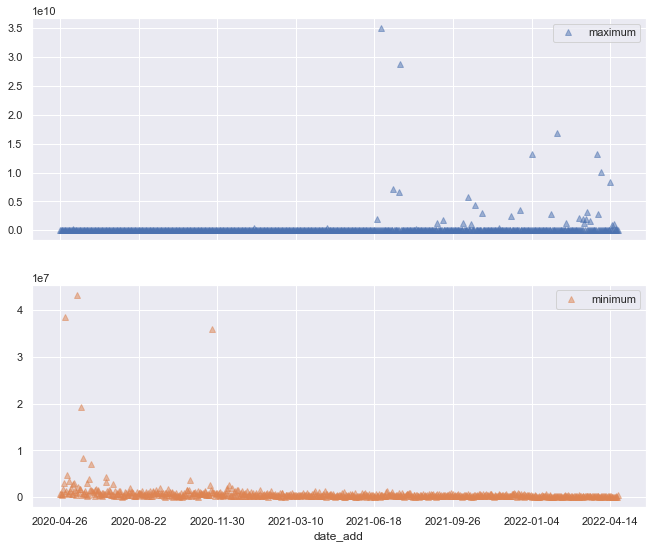

In [10]:
# Maximum and Minimum
cols_plot = ['maximum', 'minimum'] 
axes = df[cols_plot].plot(marker='^', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
#ax.set_ylabel('Frequency')
ax.set_xlabel('Date')
ax.set_title('Number of listings')
plt.show()

C:\Users\Ntando\AppData\Local\Temp/ipykernel_23376/966969428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zoom_in['date_add'] = pd.to_datetime(zoom_in['date_add'])


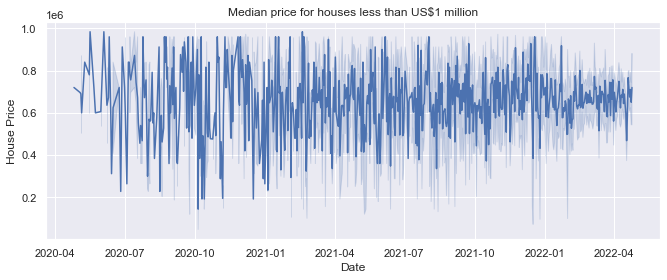

In [11]:
# Zoom in the data 
zoom_in = sales_df_.loc[sales_df_['usd_price'] < 1e6]
zoom_in['date_add'] = pd.to_datetime(zoom_in['date_add'])

ax = sns.lineplot(x = 'date_add',
            y= 'usd_price',
            data = zoom_in)

ax.set_ylabel('House Price')
ax.set_xlabel('Date')
ax.set_title('Median price for houses less than US$1 million')
plt.show()

In [12]:
# Getting City column
sales_df_['City'] = sales_df_['address'].str.split().str[-1]

In [13]:
city_df = sales_df_.groupby('City')['usd_price'].agg(median = 'median', n = 'count', minimum = 'min', maximum = 'max')
city_df

,median,n,minimum,maximum
City,,,,
Abia,660000.0,4,168000.0,7.200000e+06
Abuja,2400000.0,3907,1080.0,2.880000e+10
Anambra,4440000.0,4,1680000.0,6.000000e+06
Bayelsa,1440000.0,1,1440000.0,1.440000e+06
Delta,1176000.0,126,360000.0,1.080000e+07
Ebonyi,3600000.0,1,3600000.0,3.600000e+06
Edo,456000.0,19,264000.0,6.480000e+06
Ekiti,156000.0,4,72019.2,9.600000e+05
Enugu,1440000.0,96,192000.0,8.400000e+06


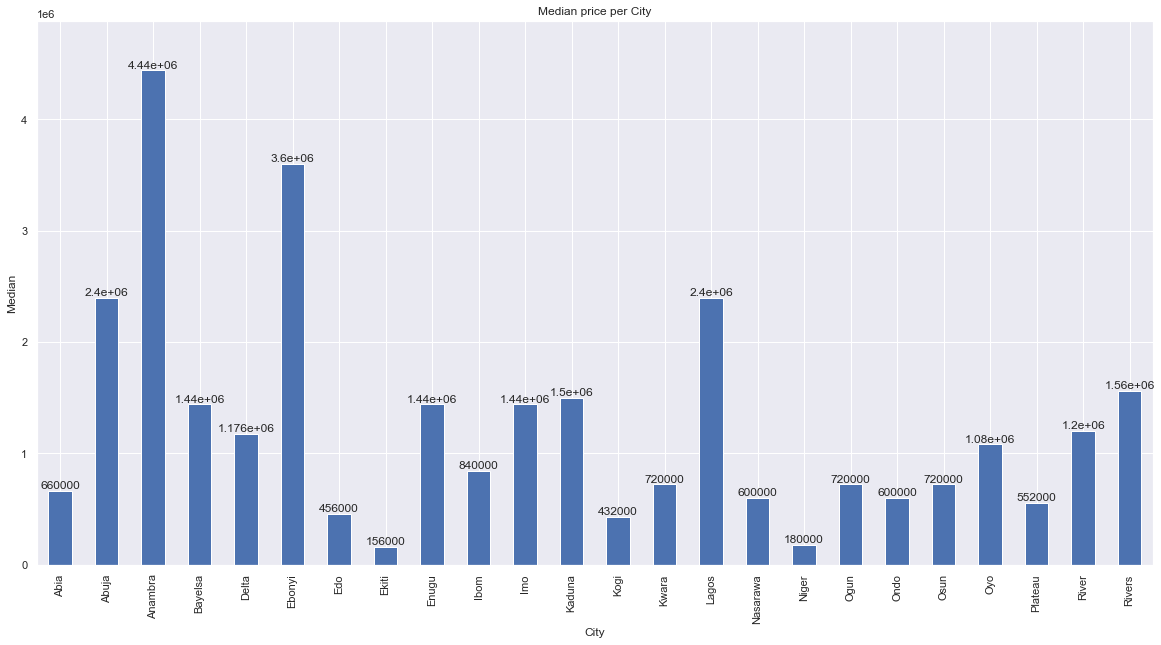

In [14]:
# City 
sns.set(rc={'figure.figsize':(20, 10)})
ax = city_df['median'].plot(kind = 'bar', title = 'Median price per City',
                     xlabel = 'City',
                     ylabel= 'Median')


# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

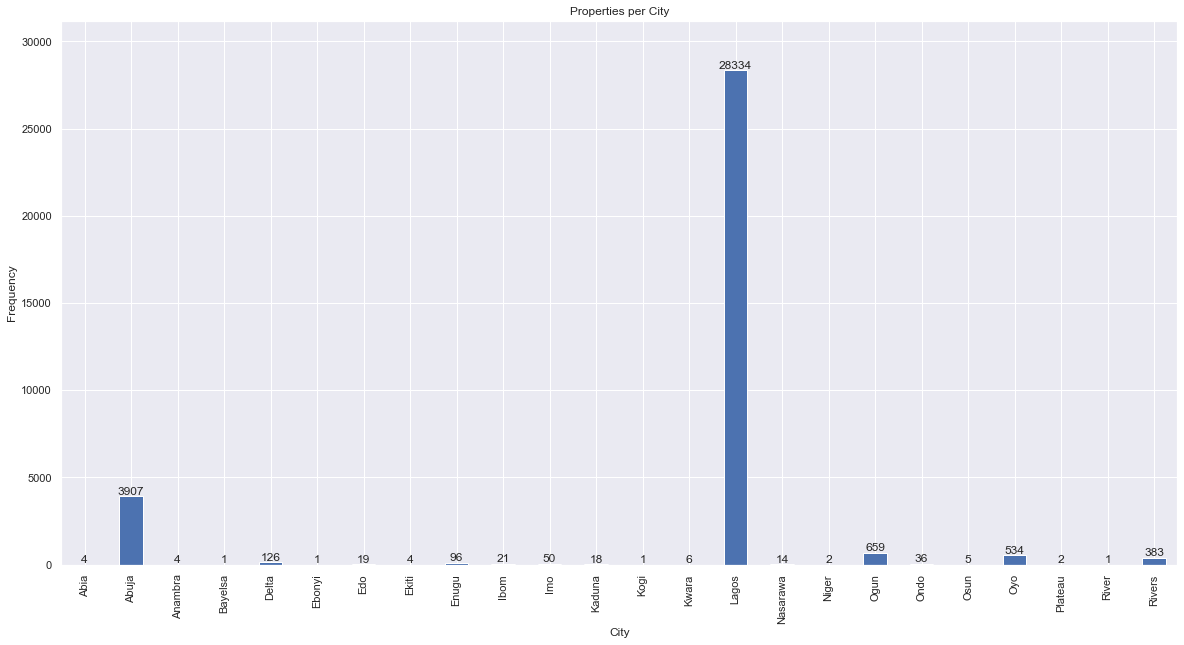

In [15]:
# City 
sns.set(rc={'figure.figsize':(20, 10)})
ax = city_df['n'].plot(kind = 'bar', title = 'Properties per City',
                     xlabel = 'City',
                     ylabel= 'Frequency')


# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

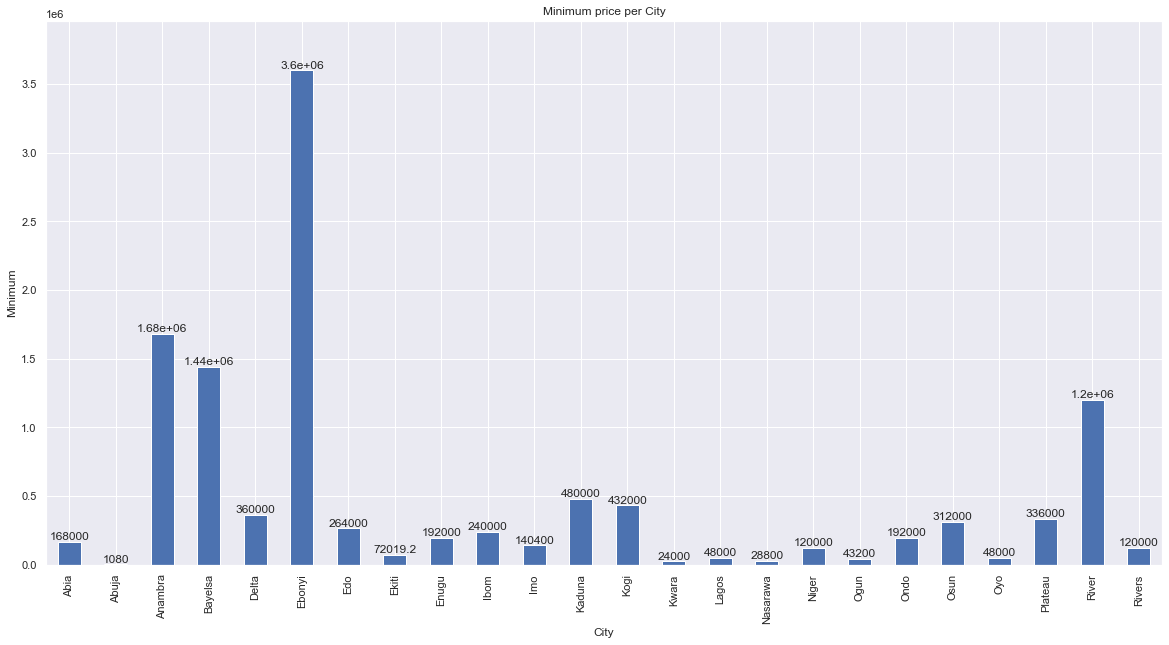

In [16]:
# City 
sns.set(rc={'figure.figsize':(20, 10)})
ax = city_df['minimum'].plot(kind = 'bar', title = 'Minimum price per City',
                     xlabel = 'City',
                     ylabel= 'Minimum')


# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

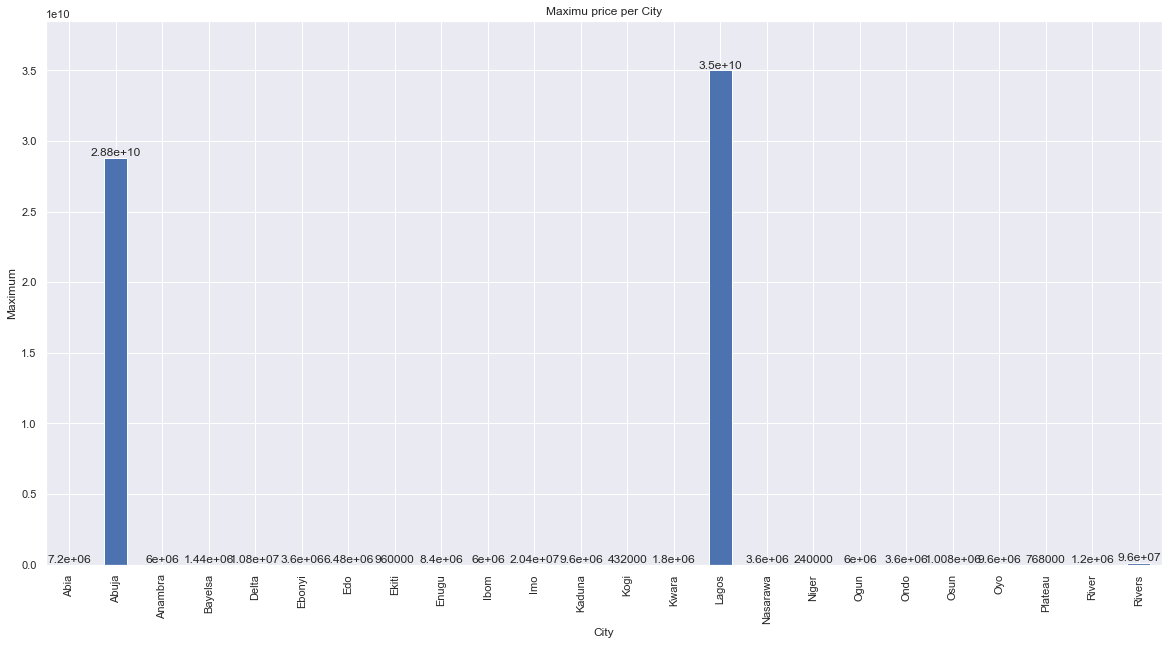

In [17]:
# City 
sns.set(rc={'figure.figsize':(20, 10)})
ax = city_df['maximum'].plot(kind = 'bar', title = 'Maximu price per City',
                     xlabel = 'City',
                     ylabel= 'Maximum')


# annotate
ax.bar_label(ax.containers[0], label_type='edge')

# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

In [18]:
sales_df_.isna().sum()

Unnamed: 0            0
ad_id                 0
date_add              0
title                 0
ad_url                0
address               0
currency              0
price_display         0
price_parsed          0
sqm_9             34217
sqm_10            34198
bedrooms            327
bathrooms          4496
toilets            3627
parking_spaces    13132
sqm               33014
sqm_11            34196
bedroom           34122
bathroom          34119
toilet            34166
parking_space     34083
sqm_12            34215
loc               11935
type                  0
type_             34228
usd_price             0
City                  0
dtype: int64

# Modelling

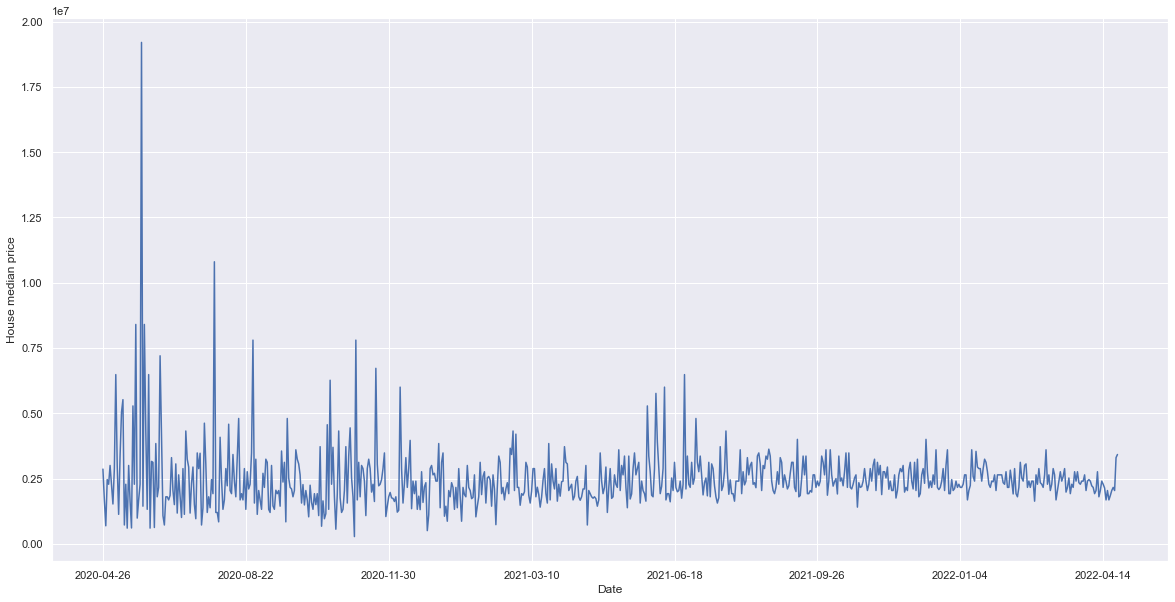

In [19]:
#Identify the outliers and replacing with the medin
def replace_outliers(series):
    absolute_differences_from_mean = np.abs(series- np.mean(series)) #Absolute difference
    
    this_mask = absolute_differences_from_mean > (np.std(series)*3)
    series[this_mask] = np.nanmedian(series)
    return series

house_prices = df.apply(replace_outliers)
ax = house_prices['median'].plot()
ax.set_ylabel('House median price')
ax.set_xlabel('Date')
plt.show()

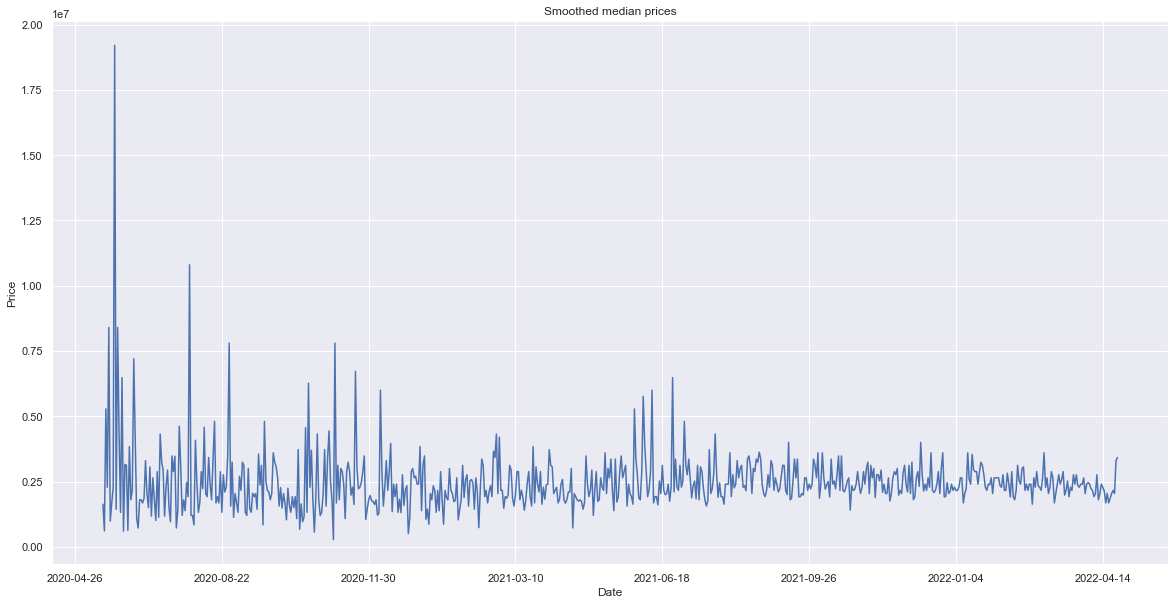

In [20]:
# Smoothing
def percent_change(series):
    previous_values = series[:-1]
    last_value = series[-1]
    
    percent_change = (last_value - np.mean(previous_values)/np.mean(previous_values))
    return percent_change

houses_smooth = house_prices.rolling(20).apply(percent_change)
ax = houses_smooth['median'].plot()
ax.set_title('Smoothed median prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.show()

In [21]:
# Getting day features
house_prices.index = pd.to_datetime(house_prices.index)
house_prices['day'] = house_prices.index.weekday
house_prices.head(20)

,mean,median,n,minimum,maximum,day
date_add,,,,,,
2020-04-26,2.860000e+06,2860000.0,2,720000.0,5000000.0,6
2020-05-04,4.792000e+06,1680000.0,3,696000.0,12000000.0,0
2020-05-05,6.895000e+05,689500.0,2,504000.0,875000.0,1
2020-05-06,2.460000e+06,2460000.0,2,600000.0,4320000.0,2
2020-05-07,2.361000e+07,2280000.0,4,1800000.0,43200000.0,3
2020-05-08,3.000000e+06,3000000.0,1,3000000.0,3000000.0,4
2020-05-09,3.840000e+07,2280000.0,1,408000.0,38400000.0,5
2020-05-10,3.372000e+06,1524000.0,4,840000.0,9600000.0,6
2020-05-11,5.928000e+06,2880000.0,5,1320000.0,19200000.0,0


In [22]:
# Time Delayed Features & Autoregressive Models

from sklearn.linear_model import Ridge

ridge = Ridge()

data = pd.Series(house_prices['median'])
data


shifts = [0,1,2,3,4,5,6,7] 
many_shifts = {'lag_{}'.format(ii): data.shift(ii) for ii in shifts}


many_shifts = pd.DataFrame(many_shifts)
many_shifts

,lag_0,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
date_add,,,,,,,,
2020-04-26,2860000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-04,1680000.0,2860000.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-05-05,689500.0,1680000.0,2860000.0,NaN,NaN,NaN,NaN,NaN
2020-05-06,2460000.0,689500.0,1680000.0,2860000.0,NaN,NaN,NaN,NaN
2020-05-07,2280000.0,2460000.0,689500.0,1680000.0,2860000.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-04-20,2040000.0,1848000.0,1680000.0,2040000.0,1680000.0,2136000.0,2280000.0,2400000.0
2022-04-21,2160000.0,2040000.0,1848000.0,1680000.0,2040000.0,1680000.0,2136000.0,2280000.0
2022-04-22,2040000.0,2160000.0,2040000.0,1848000.0,1680000.0,2040000.0,1680000.0,2136000.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

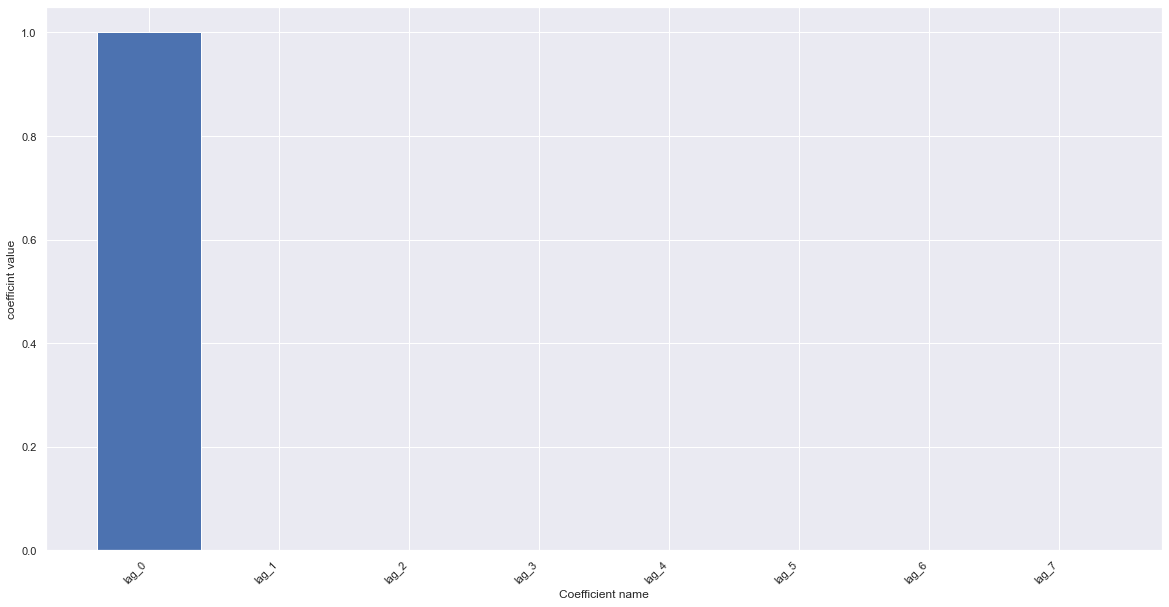

In [23]:


X = many_shifts.fillna(np.nanmedian(many_shifts))
#X = pd.concat([X, house_prices], axis=1)
y = data

ridge.fit(X,y)

fig, ax = plt.subplots()
ax.bar(X.columns, ridge.coef_)
ax.set(xlabel= 'Coefficient name',
      ylabel = 'coefficint value')
plt.setp(ax.get_xticklabels(), 
         rotation=45, 
         horizontalalignment = 'right')

C:\Users\Ntando\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.07906e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


[None, None, None, None, None, None, None, None, None, None]

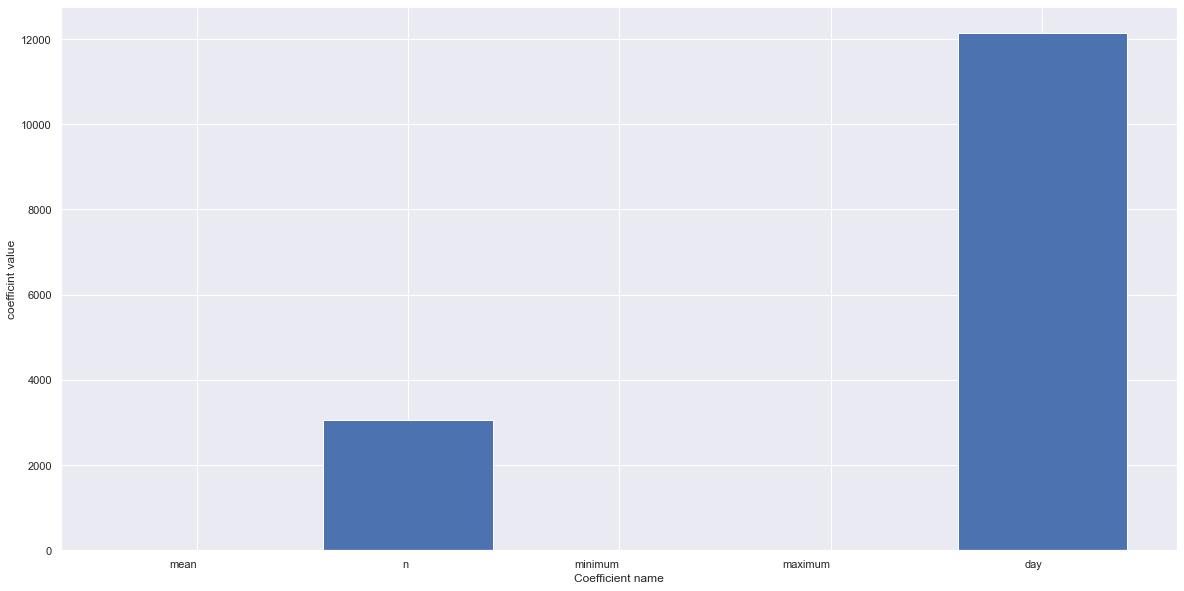

In [27]:
X_p = house_prices[['mean', 'n', 'minimum', 'maximum', 'day']]
y_p = house_prices['median']
ridge.fit(X_p,y_p)

fig, ax = plt.subplots()
ax.bar(X_p.columns, ridge.coef_)
ax.set(xlabel= 'Coefficient name',
      ylabel = 'coefficint value')
plt.setp(ax.get_xticklabels(), 
         #rotation=45, 
         horizontalalignment = 'right')

In [39]:
def visualize_coefficients(coefs, names, ax):
    # Make a bar plot for the coefficients, including their names on the x-axis
    ax.bar(names, coefs)
    ax.set(xlabel='Coefficient name', ylabel='Coefficient value')
    
    # Set formatting so it looks nice
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    return ax


In [65]:
# Cross Validating the time series

from sklearn.model_selection import KFold

cv = KFold(n_splits = 10, shuffle= False)


results = []

for tr, tt in cv.split(X_p, y_p):
    ridge.fit(X_p[tr], y_p[tr])
    prediction = ridge.predict(X_p[tt])
    score = r2_score(y[tt], prediction)
    #results.append(prediction, score, tt)

    
score

C:\Users\Ntando\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.8636e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Ntando\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.87844e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Ntando\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.87365e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Ntando\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.87381e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Ntando\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.87972e-17): result may not be accu

-0.9653169013285965

In [62]:
# Import ShuffleSplit and create the cross-validation object
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score

cv = ShuffleSplit(n_splits=10, random_state=1)

# Iterate through CV splits
results = []
for tr, tt in cv.split(X_p, y_p):
    # Fit the model on training data
    ridge.fit(X_p[tr], y_p[tr])

    # Generate predictions on the test data, score the predictions, and collect
    prediction = ridge.predict(X_p[tt])
    score = r2_score(y_p[tt], prediction)
    #results.append((prediction, score, tt))
    
    
# Custom function to quickly visualize predictions
score


C:\Users\Ntando\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.02028e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Ntando\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.92667e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Ntando\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.12647e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Ntando\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.83797e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\Ntando\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.51085e-17): result may not be acc

-0.025817474669971974